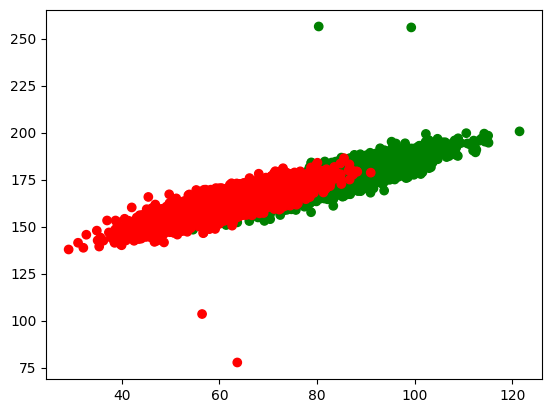

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('weight-height.csv')
data['Weight'] = data['Weight']*0.45
data['Height'] = data['Height']*2.54
data.head()
colors = {'Male':'g', 'Female':'r'}
plt.scatter(data['Weight'], data['Height'], c = data['Gender'].apply(lambda x:colors[x]))

In [2]:
# Xây dựng mô hình k-NN đối với tập dữ liệu, với k=1000
from sklearn.neighbors import KNeighborsClassifier
number_neighbor = 1000
neigh = KNeighborsClassifier(n_neighbors=number_neighbor)
neigh.fit(data[['Weight','Height']], data['Gender'])

KNeighborsClassifier(n_neighbors=1000)

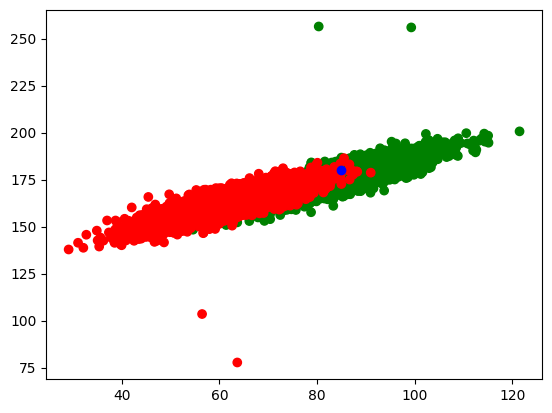

d:\ProgramFiles\Anaconda\envs\ai_class\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Male'], dtype=object)

In [3]:
# Nhập chiều cao và cân nặng và dự đoán giới tính
height = 180
weight = 85
plt.scatter(data['Weight'], data['Height'], c = data['Gender'].apply(lambda x:colors[x]))
plt.scatter(weight, height, c = 'b')
plt.show()
gender_predict = neigh.predict([[weight,height]])
gender_predict

In [4]:
# Lấy index của k điểm gần nhất
neighbors_index = neigh.kneighbors([[weight,height]], number_neighbor, return_distance=False)[0]
neighbors = data.iloc[neighbors_index]
neighbors

d:\ProgramFiles\Anaconda\envs\ai_class\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Gender,Height,Weight
4868,Male,180.164561,84.916748
3116,Male,180.243587,84.928924
2552,Male,179.752656,84.919966
2148,Male,179.742080,84.956606
352,Male,180.126222,85.300937
...,...,...,...
468,Male,181.062481,89.835897
884,Male,177.446296,89.244823
3688,Male,181.443000,89.747065
3611,Male,175.161489,86.109381


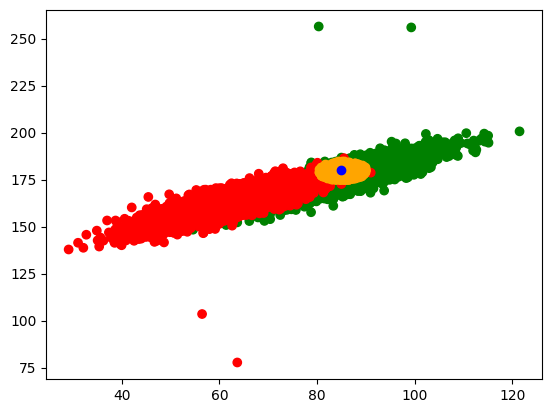

In [5]:
# Vẽ k điểm gần nhất lên trục tọa độ
plt.scatter(data['Weight'], data['Height'], c = data['Gender'].apply(lambda x:colors[x]))
plt.scatter(weight, height, c = 'b')
plt.scatter(neighbors['Weight'], neighbors['Height'], c = 'orange')
plt.scatter(weight, height, c='blue')
plt.show()